In [7]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cat-and-dog:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F23777%2F30378%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240318%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240318T054837Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D95976cabb170fe9947141106525092b5b046be54490e1d3d692d870851567afed5b28fb6b521283fd09e5f40d1b4282a07f480c114b9d0e1968720c29aed702ab54be316aa12fdd8ffa146f262243a521d667dd28932255e0333a4d16f57c20b9d3b03bc0a2d5b76b60458a2744b21abfb396b73ce59a9f9abc9f2482a6c6702f582511f5e3c3fe26b16cb16b74404c215278d2730299e0556911cf8b6bf4b69492f0779cd73ecfc96d3b2dc3b5b9fe351ffa31c69d2f191064957d8d5045cdfca34bc9d6842cc03548d3e7c766247d8ddc51dce4b09018d46cb92cc5d63fbb1d3947b3fb7bb299f2abedc080205f8aac4e6f47ee0c28a1d17fba70ee45b11cb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 228487605 bytes downloaded
Downloaded and uncompressed: cat-and-dog
Data source import complete.


<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center"> Table of content</p>
</div>

<a id="title-one"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">1) Library import</p>
</div>

In [6]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# import cv2
# import sklearn
# import matplotlib.pyplot as plt
# import plotly.graph_objects as go
# import plotly.express as px
# import tensorflow as tf
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input
# from tensorflow.keras.layers import Rescaling
# from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
# from keras import callbacks
# from keras.layers import Dense, Flatten, BatchNormalization, GlobalAveragePooling2D, Dropout, Input
# from keras import Model
# from keras.layers import  Conv2D, MaxPool2D, add
# from keras.preprocessing import image
# import random
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import sklearn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Input, GlobalAveragePooling2D, Conv2D, MaxPool2D, add
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras import callbacks
from keras.preprocessing import image
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='1'

<a id="title-three"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">2) Getting data</p>
</div>

In [8]:
training_path = '../input/cat-and-dog/training_set/training_set/'
test_path = '../input/cat-and-dog/test_set/test_set/'
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 150

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="../input/cat-and-dog/training_set/training_set",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset='training'
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="../input/cat-and-dog/test_set/test_set",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42
)

valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory="../input/cat-and-dog/training_set/training_set",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset='validation'
)

Found 8005 files belonging to 2 classes.
Using 6805 files for training.
Found 2023 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.
Using 1200 files for validation.


<a id="title-four"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">3) EDA</p>
</div>

Let's see what this data is:

In [13]:
cnt_imgs = 8
cat_path = training_path + '/cats'
dog_path = training_path + '/dogs'
cat_imgs = os.listdir(cat_path)[:cnt_imgs]
dog_imgs = os.listdir(dog_path)[:cnt_imgs]

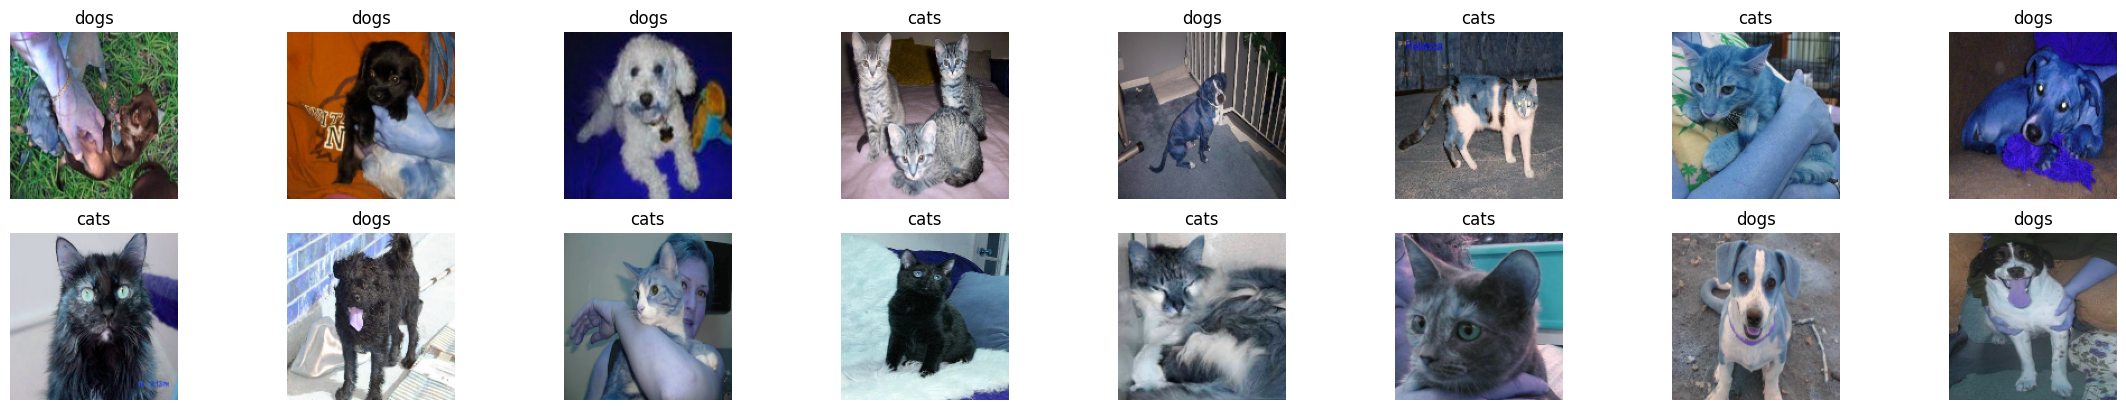

In [16]:
counter = 0
cat_imgs_path = [cat_path + '/' + i for i in cat_imgs]
dog_imgs_path = [dog_path + '/' + j for j in dog_imgs]
all_imgs = cat_imgs_path + dog_imgs_path
random.shuffle(all_imgs)


plt.figure(figsize=(28, 10))
for img_path in all_imgs:
    plt.subplot(4, 8, counter + 1)
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMAGE_SIZE)
    label = img_path[len(training_path) + 1: img_path.rfind('/')]
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    counter += 1

Let's also see if there is an imbalance of classes:

In [17]:
def check_cnt_label(label: str) -> int:
    cnt_object = 0
    paths = [training_path, test_path]
    for path in paths:
        path += '/' + label
        cnt_object += len(os.listdir(path))
    return cnt_object

CNT_CAT = check_cnt_label('cats')
CNT_DOG = check_cnt_label('dogs')

In [19]:
fig = go.Figure()
colors = ['blue', 'green']

fig.add_trace(go.Bar(
    x=['Cats', 'Dogs'],
    y=[CNT_CAT, CNT_DOG],
    width=[0.4, 0.4],
    marker_color=colors))

fig.update_layout(title='Classes and their number in the dataset', title_x=0.5)

<a id="title-five"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">4) Data preprocessing </p>
</div>

In [20]:
rescale = Rescaling(scale=1.0 / 255)

train_ds = train_ds.map(lambda image, label: (rescale(image), label))

valid_ds  = valid_ds.map(lambda image, label: (rescale(image), label))

test_ds = test_ds.map(lambda image, label: (rescale(image), label))

<a id="title-six"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">5) Creating a CNN model</p>
</div>

To reduce overfitting, we will use the following methods:
- Change the number of epochs  
- Use callback  
- Change the complexity of the model  
- Use Dropout layers in the model

In [21]:
# We will also set the number of epochs:
EPOCHS = 40

In [22]:
CALLBACKS = [
    callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=7, verbose=1),
    callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=0.01, min_lr=1e-10, patience=2, verbose=1, mode='auto')
]

In [23]:
inputs = Input(shape=(IMAGE_SIZE + (3,)))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
block_1_output = MaxPool2D(pool_size=(3, 3))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(block_1_output)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, (3, 3), activation='relu', padding='same')(block_2_output)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
block_3_output = add([x, block_2_output])

x = Conv2D(128, (3, 3), activation='relu')(block_3_output)
x = MaxPool2D(pool_size=(2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [24]:
model = Model(inputs, output)

In [25]:
model.compile(metrics=['Accuracy'], loss='binary_crossentropy', optimizer='Adam')

In [26]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=valid_ds, callbacks=CALLBACKS)

Epoch 1/40
46/46 [==============================] - 39s 470ms/step - loss: 0.6989 - Accuracy: 0.5785 - val_loss: 0.6927 - val_Accuracy: 0.4933 - lr: 0.0010
Epoch 2/40
46/46 [==============================] - 18s 360ms/step - loss: 0.6177 - Accuracy: 0.6492 - val_loss: 0.7107 - val_Accuracy: 0.4917 - lr: 0.0010
Epoch 3/40
46/46 [==============================] - 17s 336ms/step - loss: 0.5812 - Accuracy: 0.6935 - val_loss: 0.7986 - val_Accuracy: 0.4917 - lr: 0.0010
Epoch 4/40
46/46 [==============================] - 18s 362ms/step - loss: 0.5414 - Accuracy: 0.7231 - val_loss: 0.8389 - val_Accuracy: 0.4917 - lr: 0.0010
Epoch 5/40
46/46 [==============================] - 18s 367ms/step - loss: 0.5136 - Accuracy: 0.7459 - val_loss: 0.9304 - val_Accuracy: 0.4917 - lr: 0.0010
Epoch 6/40
46/46 [==============================] - 17s 359ms/step - loss: 0.4772 - Accuracy: 0.7793 - val_loss: 0.8656 - val_Accuracy: 0.4917 - lr: 0.0010
Epoch 7/40
46/46 [==============================] - 18s 356ms/st

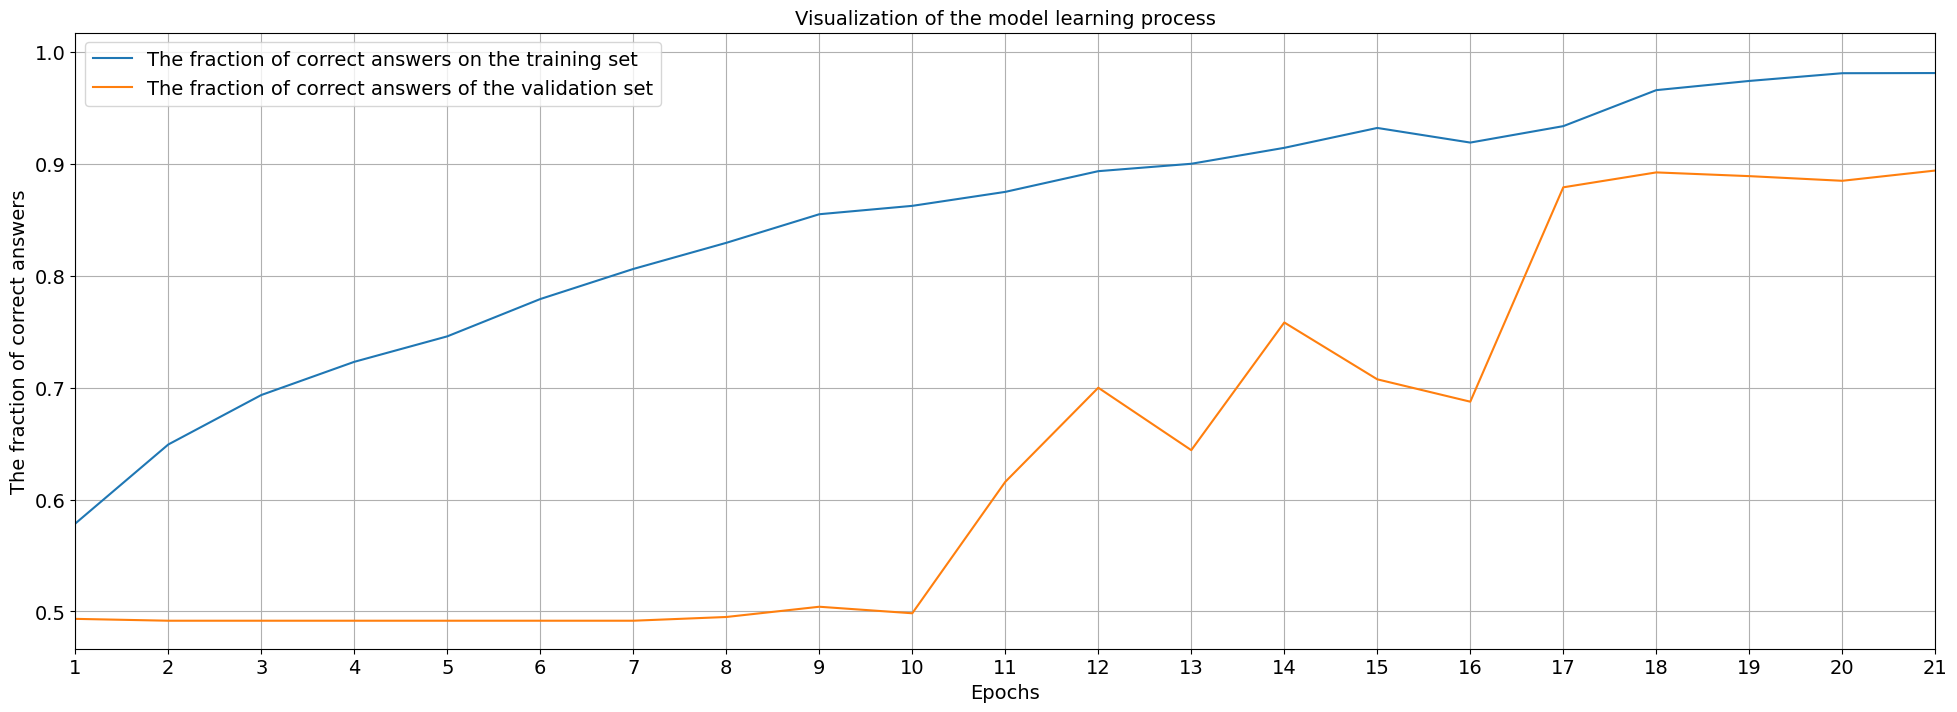

In [33]:
plt.figure(figsize=(24, 8))
plt.title('Visualization of the model learning process', fontsize=14)
plt.plot(np.arange(1, EPOCHS -7), history.history['Accuracy'], label='The fraction of correct answers on the training set')
plt.plot(np.arange(1, EPOCHS -7), history.history['val_Accuracy'], label='The fraction of correct answers of the validation set')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('The fraction of correct answers', fontsize=14)
plt.xticks(np.arange(1, EPOCHS + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1, 21)
plt.grid()
plt.legend(fontsize=14)
plt.show()

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 148, 148, 32)         896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 148, 148, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 146, 146, 64)         18496     ['batch_normalization[0][0

In [35]:
test_result = model.evaluate(test_ds, verbose=0)[1]
train_result = model.evaluate(train_ds, verbose=0)[1]
print(f'Metric on test: {test_result}')
print(f'Metric on train: {train_result}')

Metric on test: 0.9006426334381104
Metric on train: 0.9933872222900391


In [36]:
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



<a id="title-six"></a>
<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#314f90;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;">

<p style="font-size:35px; color:white; text-align:center">END</p>
</div>